In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.metrics


In [10]:
df = pd.read_csv('diabetes.csv').iloc[:,1:].sample(frac=1)
y=df['Diabetes_binary'].astype('int32')
df.drop(columns=['Diabetes_binary'])
df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
55440,1.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
14716,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,6.0
66159,1.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
39815,1.0,1.0,1.0,1.0,44.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,0.0,0.0,1.0,5.0,1.0
2341,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47356,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,7.0
67733,1.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,6.0,8.0
47114,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,6.0,7.0
67454,1.0,0.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0


In [11]:
split = 0.8
limit = round(df.shape[0]*0.8)

x_train,y_train = df.iloc[:limit],y[:limit]
x_test,y_test =  df.iloc[limit:],y[limit:] 


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [13]:
model.fit(x_train,y_train,epochs=1)

1768/1768 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8826


In [14]:
y_calc = model.predict(x_test)
loss,accur = model.evaluate(x_test,y_test)
accur,loss

442/442 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9934


(0.9934219717979431, 0.17973341047763824)

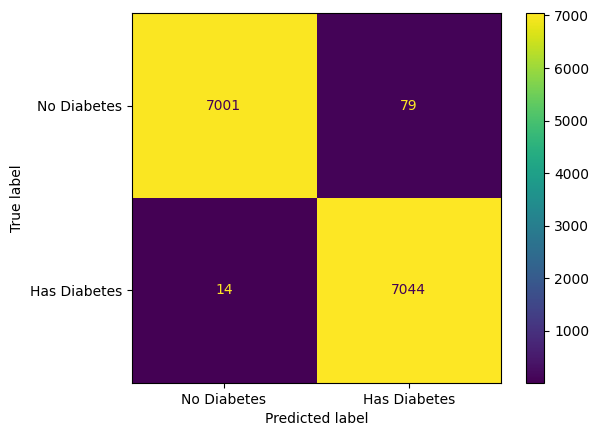

In [18]:
conf = sklearn.metrics.confusion_matrix(y_true=y_test,y_pred=np.argmax(y_calc,axis=1),labels=[0,1])
conf_matrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["No Diabetes","Has Diabetes"])
conf_matrix.plot()